In [1]:
from pcnn.parameters import parameters
from pcnn.util import load_data
from pcnn.model import Model

# Load data, define interval
data = load_data('umar')
interval = 15

display(data.head())

data.columns

,Solar irradiation,Outside temperature,Temperature 272,Temperature 273,Temperature 274,Month sin,Month cos,Weekday,Timestep sin,Timestep cos,Power 272,Power 273,Power 274,Case
2019-05-01 00:00:00,0.0,7.877023,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.000000,1.000000,0.0,0.0,0.0,1.0
2019-05-01 00:15:00,0.0,7.631382,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.065403,0.997859,0.0,0.0,0.0,1.0
2019-05-01 00:30:00,0.0,7.527863,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.130526,0.991445,0.0,0.0,0.0,1.0
2019-05-01 00:45:00,0.0,7.343938,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.195090,0.980785,0.0,0.0,0.0,1.0
2019-05-01 01:00:00,0.0,7.193133,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.258819,0.965926,0.0,0.0,0.0,1.0


Index(['Solar irradiation', 'Outside temperature', 'Temperature 272',
       'Temperature 273', 'Temperature 274', 'Month sin', 'Month cos',
       'Weekday', 'Timestep sin', 'Timestep cos', 'Power 272', 'Power 273',
       'Power 274', 'Case'],
      dtype='object')

In [2]:
model_kwargs = parameters(unit='UMAR',
                            to_normalize=True,
                            name="PCNN",
                            seed=0,

                            overlapping_distance=4,
                            warm_start_length=12,
                            maximum_sequence_length=96*3,
                            minimum_sequence_length=48,
                            learn_initial_hidden_states=True,
                            decrease_learning_rate=False,
                            learning_rate=0.0005,
                            feed_input_through_nn=True,
                            input_nn_hidden_sizes=[32],
                            lstm_hidden_size=64,
                            lstm_num_layers=2,
                            layer_norm=True,
                            batch_size=256,
                            output_nn_hidden_sizes=[32],
                            division_factor=10.,
                            verbose=2)

module = 'PCNN'
rooms = '272'

# No need of info on room 274 as input
X_columns = ['Solar irradiation', 'Outside temperature', 'Temperature 272', 'Temperature 273', 'Month sin', 
            'Month cos', 'Weekday', 'Timestep sin', 'Timestep cos', 'Power 272', 'Case']
Y_columns = ['Temperature 272']

# Corresponding columns
case_column = -1
out_column = 1
neigh_column = 3
temperature_column = 2
power_column = -2

# Info to use in D
inputs_D = [0, 4, 5, 6, 7, 8]

topology = None # Not needed in the single-zone case

# Trying to load a model or not, if yes the last one or the best one
load = True
load_last = True

pcnn = Model(data=data, interval=interval, model_kwargs=model_kwargs, inputs_D=inputs_D, 
            module=module, rooms=rooms, case_column=case_column, out_column=out_column, neigh_column=neigh_column, 
            temperature_column=temperature_column, power_column=power_column,
            Y_columns=Y_columns, X_columns=X_columns, topology=topology, load_last=load_last,
            load=load, device='cpu')

2025-02-14 13:22:54.306 | INFO     | pcnn.data:prepare_data:205 - Preparing the data...
2025-02-14 13:22:54.307 | INFO     | pcnn.data:prepare_data:225 - Normalizing the data...
2025-02-14 13:22:54.318 | INFO     | pcnn.data:prepare_data:239 - Data ready!

2025-02-14 13:22:54.318 | INFO     | pcnn.model:__init__:124 - Sanity check of the columns:
[('Case', ['Case']), ('Room temp', ['Temperature 272']), ('Room power', ['Power 272']), ('Out temp', ['Outside temperature']), ('Neigh temp', ['Temperature 273'])]
2025-02-14 13:22:54.319 | INFO     | pcnn.model:__init__:128 - Inputs used in D:
['Solar irradiation' 'Month sin' 'Month cos' 'Weekday' 'Timestep sin'
 'Timestep cos']

2025-02-14 13:22:54.621 | INFO     | pcnn.model:load:1002 - Trying to load a trained model...
2025-02-14 13:22:54.678 | INFO     | pcnn.model:load:1040 - Found! It contains 8763 training, 2505 validation, and 1373 test sequences.
2025-02-14 13:22:54.679 | INFO     | pcnn.model:load:1042 - The model has been fitted fo

In [3]:
train = False
if train:
    pcnn.fit(250)

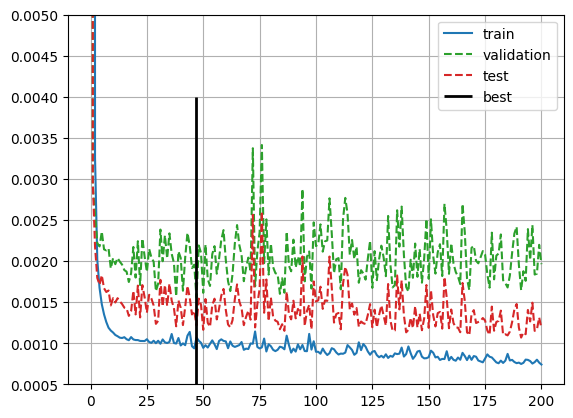

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(pcnn.train_losses, c='tab:blue', label='train')
plt.plot(pcnn.validation_losses, c='tab:green', ls='--', label='validation')
plt.plot(pcnn.test_losses, c='tab:red', ls='--', label='test')
plt.vlines(x=np.argmin(pcnn.validation_losses), ymin=0.0005, ymax=0.004, color='black', lw=2, label='best')
plt.ylim(0.0005, 0.005)
plt.legend()
plt.grid()

In [5]:
load_last = False

pcnn = Model(data=data, interval=interval, model_kwargs=model_kwargs, inputs_D=inputs_D, 
            module=module, rooms=rooms, case_column=case_column, out_column=out_column, neigh_column=neigh_column, 
            temperature_column=temperature_column, power_column=power_column,
            Y_columns=Y_columns, X_columns=X_columns, topology=topology, load_last=load_last,
            load=load, device='cpu')

2025-02-14 13:22:54.874 | INFO     | pcnn.data:prepare_data:205 - Preparing the data...
2025-02-14 13:22:54.875 | INFO     | pcnn.data:prepare_data:225 - Normalizing the data...
2025-02-14 13:22:54.885 | INFO     | pcnn.data:prepare_data:239 - Data ready!

2025-02-14 13:22:54.885 | INFO     | pcnn.model:__init__:124 - Sanity check of the columns:
[('Case', ['Case']), ('Room temp', ['Temperature 272']), ('Room power', ['Power 272']), ('Out temp', ['Outside temperature']), ('Neigh temp', ['Temperature 273'])]
2025-02-14 13:22:54.886 | INFO     | pcnn.model:__init__:128 - Inputs used in D:
['Solar irradiation' 'Month sin' 'Month cos' 'Weekday' 'Timestep sin'
 'Timestep cos']

2025-02-14 13:22:54.888 | INFO     | pcnn.model:load:1002 - Trying to load a trained model...
2025-02-14 13:22:54.906 | INFO     | pcnn.model:load:1040 - Found! It contains 8763 training, 2505 validation, and 1373 test sequences.
2025-02-14 13:22:54.906 | INFO     | pcnn.model:load:1044 - The model achieved its best 